# Cloning the **damavand** repository

In [1]:
!git clone https://github.com/amirberenji1995/damavand

fatal: destination path 'damavand' already exists and is not an empty directory.


In [2]:
!pip install -r damavand/requirements.txt

# Importings

In [3]:
from damavand.damavand.datasets.downloaders import read_addresses, ZipDatasetDownloader
from damavand.damavand.datasets.digestors import SEU
from damavand.damavand.signal_processing import *
from damavand.damavand.utils import *
import pandas as pd
import numpy as np

# Instantiating a downloader object

In [5]:
addresses = read_addresses()
downloader = ZipDatasetDownloader(addresses['SEU'])
downloader.download_extract('SEU.zip', 'SEU/')

# Instantiating a digestor object

In [6]:
seu = SEU('SEU/')
mining_params = {
    'win_len': 10000,
    'hop_len': 10000
}
seu.mine(mining_params)

Mining:  outer_30_2.csv
Mining:  health_30_2.csv
Mining:  ball_20_0.csv
Mining:  comb_20_0.csv
Mining:  inner_30_2.csv
Mining:  ball_30_2.csv
Mining:  outer_20_0.csv
Mining:  health_20_0.csv
Mining:  comb_30_2.csv
Mining:  inner_20_0.csv
Mining:  Root_30_2.csv
Mining:  Health_20_0.csv
Mining:  Miss_30_2.csv
Mining:  Root_20_0.csv
Mining:  Miss_20_0.csv
Mining:  Chipped_20_0.csv
Mining:  Health_30_2.csv
Mining:  Chipped_30_2.csv
Mining:  Surface_30_2.csv
Mining:  Surface_20_0.csv


# Aggregating data over the second channel

In [7]:
df = pd.concat(seu.data[1]).reset_index(drop = True)
df

,0,1,2,3,4,5,6,7,8,9,...,9993,9994,9995,9996,9997,9998,9999,test_bed,state,rot_speed
0,0.007036,-0.004730,0.003291,0.002851,-0.001183,0.002030,0.003911,-0.003121,0.008066,-0.000803,...,-0.003049,-0.000881,0.001383,0.001929,-0.003808,0.001971,-0.003889,Bearing_set,outer,30
1,-0.001651,0.004479,-0.004823,0.003951,-0.000782,0.001076,0.000440,-0.001013,-0.003558,-0.002764,...,0.006781,-0.000606,-0.003998,0.011386,-0.009551,0.002255,0.011014,Bearing_set,outer,30
2,0.002228,0.002011,0.008874,-0.007194,-0.002810,0.007602,-0.007988,-0.006306,0.007025,0.003126,...,0.003403,-0.002611,0.004867,-0.003563,-0.018693,0.004125,-0.015082,Bearing_set,outer,30
3,-0.008290,0.014497,-0.008516,0.010085,0.017369,-0.002058,-0.009407,0.002279,-0.020185,-0.000169,...,0.001574,0.004683,-0.002359,-0.005109,0.004101,0.001482,-0.005395,Bearing_set,outer,30
4,0.011311,0.005745,0.000563,0.009884,-0.000458,-0.011659,0.001686,-0.000843,-0.011094,0.010875,...,-0.005438,0.001444,0.001721,0.002047,0.007225,0.001767,0.001361,Bearing_set,outer,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2075,0.002087,-0.003910,0.001359,-0.000019,-0.001323,-0.000682,-0.000097,-0.002244,0.002137,0.007447,...,0.000615,-0.000725,-0.000968,-0.000067,-0.001091,-0.002719,-0.001736,Gear_set,Surface,20
2076,-0.003231,-0.000545,0.000659,0.004239,0.004506,0.005094,0.004002,-0.001067,-0.001844,-0.001292,...,-0.003008,0.004628,-0.001433,-0.001026,0.003266,0.001745,-0.004375,Gear_set,Surface,20
2077,0.001314,-0.007402,0.003731,0.008777,-0.004417,0.008053,0.001857,-0.000809,0.003054,0.001686,...,-0.000052,0.000985,-0.002148,-0.006410,0.002007,-0.002671,0.002186,Gear_set,Surface,20
2078,-0.001049,0.001210,0.000823,-0.002074,-0.003736,-0.003176,0.000865,-0.000254,0.005950,0.001850,...,0.001780,0.002376,-0.002375,-0.005963,0.003232,-0.002201,-0.004019,Gear_set,Surface,20


# Signals-Metadata declaration

In [8]:
signals, metadata = df.iloc[:, : - 3], df.iloc[:, - 3 :]
signals

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,0.007036,-0.004730,0.003291,0.002851,-0.001183,0.002030,0.003911,-0.003121,0.008066,-0.000803,...,-0.000837,-0.002404,0.003749,-0.003049,-0.000881,0.001383,0.001929,-0.003808,0.001971,-0.003889
1,-0.001651,0.004479,-0.004823,0.003951,-0.000782,0.001076,0.000440,-0.001013,-0.003558,-0.002764,...,0.005550,0.009086,-0.002220,0.006781,-0.000606,-0.003998,0.011386,-0.009551,0.002255,0.011014
2,0.002228,0.002011,0.008874,-0.007194,-0.002810,0.007602,-0.007988,-0.006306,0.007025,0.003126,...,-0.002379,-0.011760,0.010343,0.003403,-0.002611,0.004867,-0.003563,-0.018693,0.004125,-0.015082
3,-0.008290,0.014497,-0.008516,0.010085,0.017369,-0.002058,-0.009407,0.002279,-0.020185,-0.000169,...,0.001446,0.008177,0.000354,0.001574,0.004683,-0.002359,-0.005109,0.004101,0.001482,-0.005395
4,0.011311,0.005745,0.000563,0.009884,-0.000458,-0.011659,0.001686,-0.000843,-0.011094,0.010875,...,-0.002936,-0.002419,-0.001042,-0.005438,0.001444,0.001721,0.002047,0.007225,0.001767,0.001361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2075,0.002087,-0.003910,0.001359,-0.000019,-0.001323,-0.000682,-0.000097,-0.002244,0.002137,0.007447,...,0.002068,0.001866,-0.000638,0.000615,-0.000725,-0.000968,-0.000067,-0.001091,-0.002719,-0.001736
2076,-0.003231,-0.000545,0.000659,0.004239,0.004506,0.005094,0.004002,-0.001067,-0.001844,-0.001292,...,-0.007876,0.000889,-0.007678,-0.003008,0.004628,-0.001433,-0.001026,0.003266,0.001745,-0.004375
2077,0.001314,-0.007402,0.003731,0.008777,-0.004417,0.008053,0.001857,-0.000809,0.003054,0.001686,...,-0.005653,-0.000054,-0.000433,-0.000052,0.000985,-0.002148,-0.006410,0.002007,-0.002671,0.002186
2078,-0.001049,0.001210,0.000823,-0.002074,-0.003736,-0.003176,0.000865,-0.000254,0.005950,0.001850,...,-0.003269,0.000856,-0.001978,0.001780,0.002376,-0.002375,-0.005963,0.003232,-0.002201,-0.004019


In [9]:
metadata

,test_bed,state,rot_speed
0,Bearing_set,outer,30
1,Bearing_set,outer,30
2,Bearing_set,outer,30
3,Bearing_set,outer,30
4,Bearing_set,outer,30
...,...,...,...
2075,Gear_set,Surface,20
2076,Gear_set,Surface,20
2077,Gear_set,Surface,20
2078,Gear_set,Surface,20


# Signal Processing

## Envelope Extraction

In [12]:
signals_env = env(signals)
signals_env.shape

(2080, 10000)

## FFT

In [13]:
window = scipy.signal.windows.hann(signals_env.shape[1])
freq_filter = scipy.signal.butter(25, [15, 950], 'bandpass', fs = 2000, output='sos')

In [14]:
signals_env_fft = fft(signals_env, freq_filter = freq_filter, window = window)
signals_env_fft.shape

(2080, 5000)

## ZoomedFFT

In [15]:
signals_env_ZoomedFFT = zoomed_fft(signals_env, 0, 750, 1500, 2000, freq_filter = freq_filter, window = window)
signals_env_ZoomedFFT.shape

(2080, 1500)

## STFT

In [16]:
STFT_window = scipy.signal.windows.hann(1000)
STFT_freq_filter = scipy.signal.butter(25, [15, 950], 'bandpass', fs = 2000, output='sos')
signals_env_STFT = stft(signals_env, 1000, 250, STFT_freq_filter, STFT_window)
signals_env_STFT.shape

(2080, 36, 500)

## Statistical Features

In [17]:
feature(signals, {'mean': np.mean, 'var': np.var, 'rms': rms})

,mean,var,rms
0,0.000785,0.000024,0.004962
1,0.000783,0.000029,0.005447
2,0.000776,0.000024,0.004975
3,0.000748,0.000027,0.005262
4,0.000745,0.000028,0.005358
...,...,...,...
2075,0.000919,0.000015,0.003938
2076,0.000954,0.000014,0.003855
2077,0.000982,0.000016,0.004174
2078,0.000892,0.000014,0.003820


# Visualization

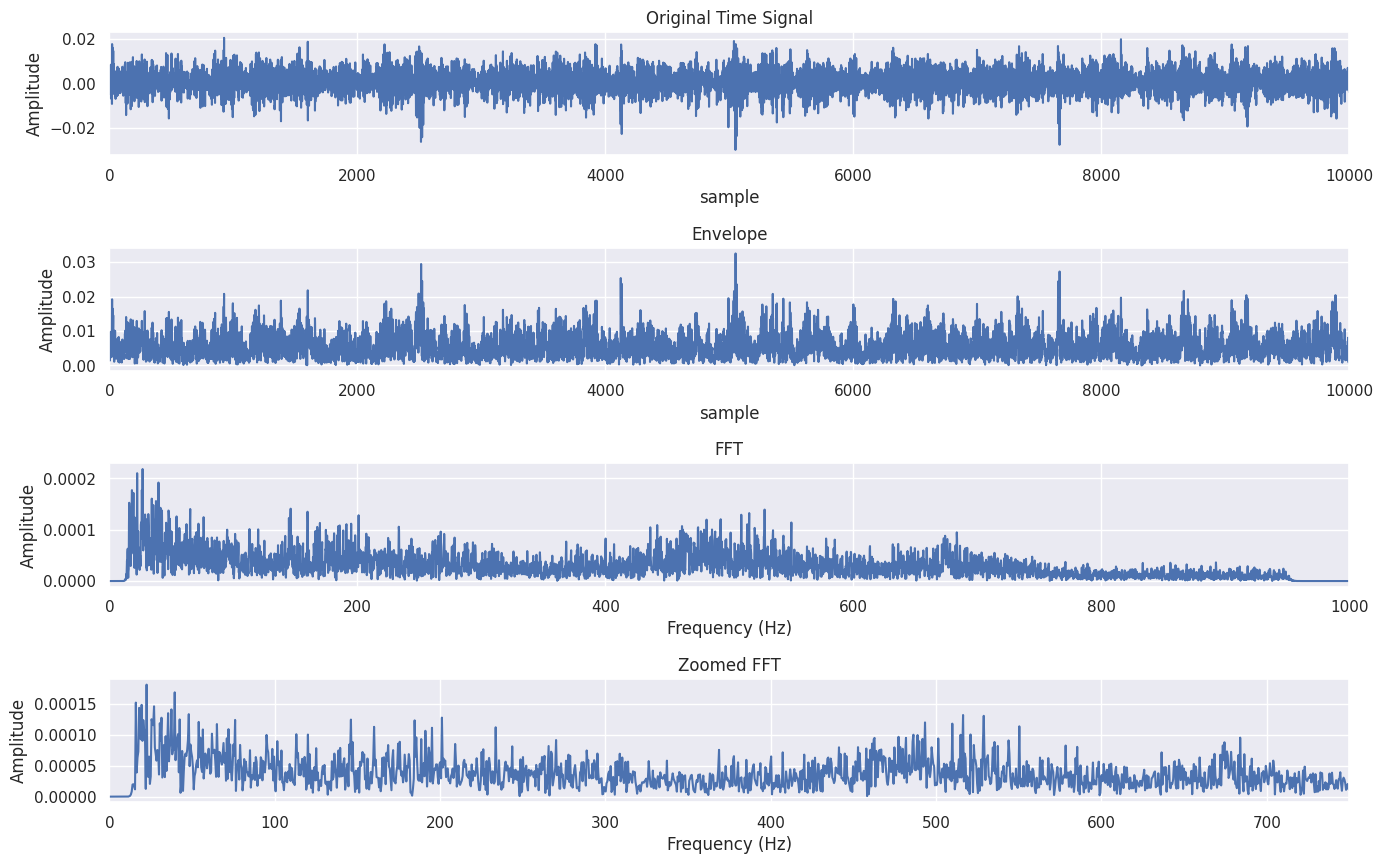

In [22]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.set()

fig, axes = plt.subplots(4, 1, figsize = (16, 10))

sns.lineplot(ax=axes[0], x=range(len(signals.iloc[0,:])), y = signals.iloc[0,:])
axes[0].set_title("Original Time Signal")
axes[0].set_ylabel("Amplitude")
axes[0].set_xlabel("sample")
axes[0].set_xlim(0, 10000)

sns.lineplot(ax=axes[1], x=range(len(signals_env.iloc[0,:])), y = signals_env.iloc[0, :])
axes[1].set_title("Envelope")
axes[1].set_ylabel("Amplitude")
axes[1].set_xlabel("sample")
axes[1].set_xlim(0, 10000)


sns.lineplot(ax=axes[2], x = fft_freq_axis(10000, 2000), y = signals_env_fft.iloc[0, :])
axes[2].set_title("FFT")
axes[2].set_ylabel("Amplitude")
axes[2].set_xlabel("Frequency (Hz)")
axes[2].set_xlim(0, 1000)


sns.lineplot(ax=axes[3], x = zoomed_fft_freq_axis(0, 750, 1500), y = signals_env_ZoomedFFT.iloc[0, :])
axes[3].set_title("Zoomed FFT")
axes[3].set_ylabel("Amplitude")
axes[3].set_xlabel("Frequency (Hz)")
axes[3].set_xlim(0, 750)


plt.subplots_adjust(hspace = 0.75)
fig.show()

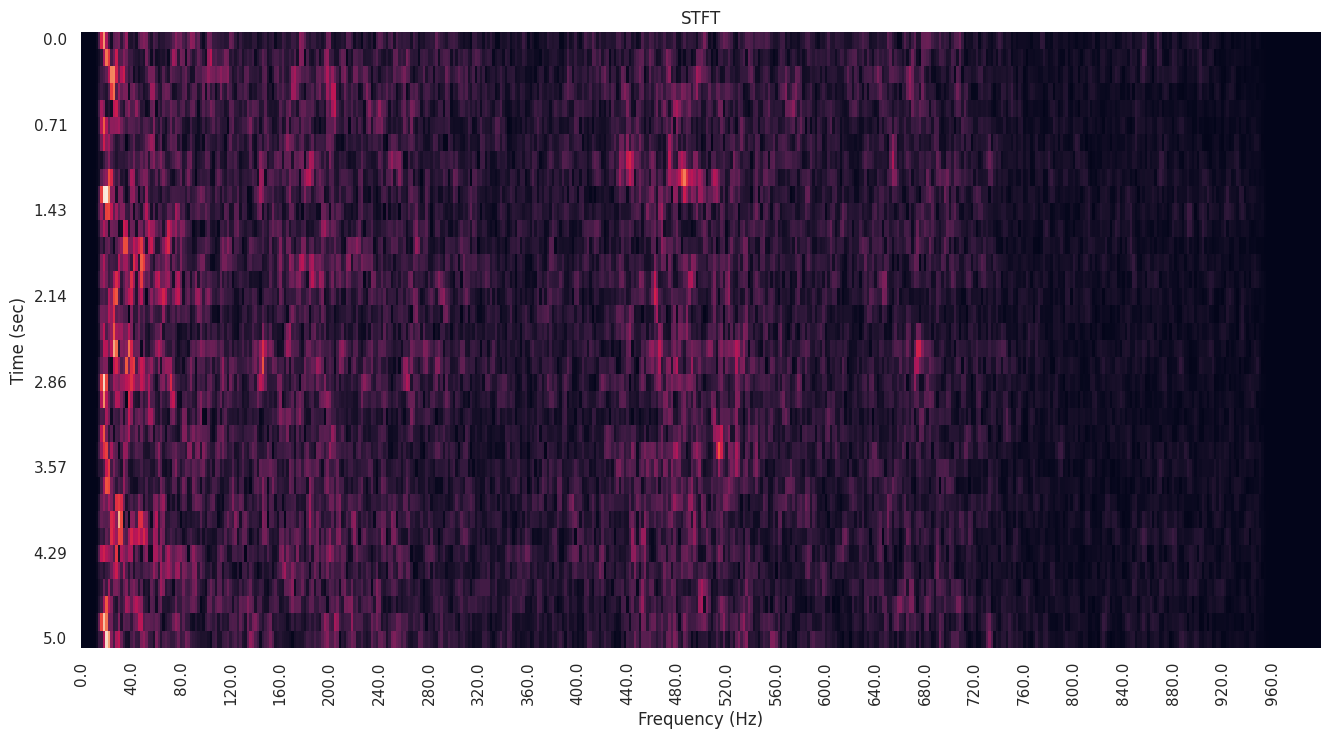

In [23]:
t = np.linspace(0, 5, 36)
f = fft_freq_axis(1000, 2000)

fig, ax = plt.subplots(figsize = (16, 8))

ax = sns.heatmap(signals_env_STFT[0, :, :], xticklabels = np.round(f, decimals = 2), yticklabels = np.round(t, decimals = 2), annot = False, cbar = False)
ax.set(xlabel = 'Frequency (Hz)', ylabel = 'Time (sec)')
ax.set_title('STFT')
ax.set_xticks(ax.get_xticks()[::20])
ax.set_yticks(ax.get_yticks()[::5])


fig.show()